<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Import Required Libraries</h1>

In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import squarify 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene, stats, ttest_ind
print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Loading Dataset</h1>

In [151]:
data = pd.read_csv('../Datasets/ab_test_fertilizer_robust.csv')
data.head()

,Fertilizer,Soil Type,Rainfall,Density,Yield (tons/ha)
0,Organic|Inorganic,Loamy,Low,High,56.862906
1,Organic,Clay,High,Low,48.523054
2,Organic|Inorganic,Clay,Low,Medium,59.094197
3,Organic|Inorganic,Clay,High,Low,59.053559
4,Organic,Clay,Low,High,38.825278


In [152]:
data.columns.tolist()

['Fertilizer', 'Soil Type', 'Rainfall', 'Density', 'Yield (tons/ha)']

In [153]:
data.shape

(300, 5)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertilizer       300 non-null    object 
 1   Soil Type        300 non-null    object 
 2   Rainfall         300 non-null    object 
 3   Density          300 non-null    object 
 4   Yield (tons/ha)  300 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


In [155]:
data.nunique()

Fertilizer           3
Soil Type            3
Rainfall             3
Density              3
Yield (tons/ha)    300
dtype: int64

In [156]:
df.isnull().sum()

Fertilizer    0
Soil Type     0
Rainfall      0
Density       0
Yield         0
dtype: int64

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Data Cleaning and Visualization</h1>

- To clean and reformat the data for easier interpretation, including adjusting the format of fertilizer comparisons in the output.

- To visualize the comparison between different fertilizers in a way that is both informative and accessible for decision-making. Also to understand the distribution of the data and spot any potential anomalies.

In [80]:
numerical_cols = data.select_dtypes(include=['number'])
def remove_outliers_iqr(data, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        
        data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    
    return data, outlier_counts


cleaned_data, outlier_counts = remove_outliers_iqr(data, numerical_cols)

total_length = 100 
print(f"\n {' ' * 35}Outliers Detected (Count):")
for col, count in outlier_counts.items():
    Text_length = len(col)
    remaining_length = total_length - Text_length - len(str(count)) - 3
    print(f"{col} : {'.' * remaining_length}{count}")


                                    Outliers Detected (Count):
Yield (tons/ha) : .................................................................................4


<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Exploring Data Distribution</span>
- To understand the distribution of the data and spot any potential anomalies.

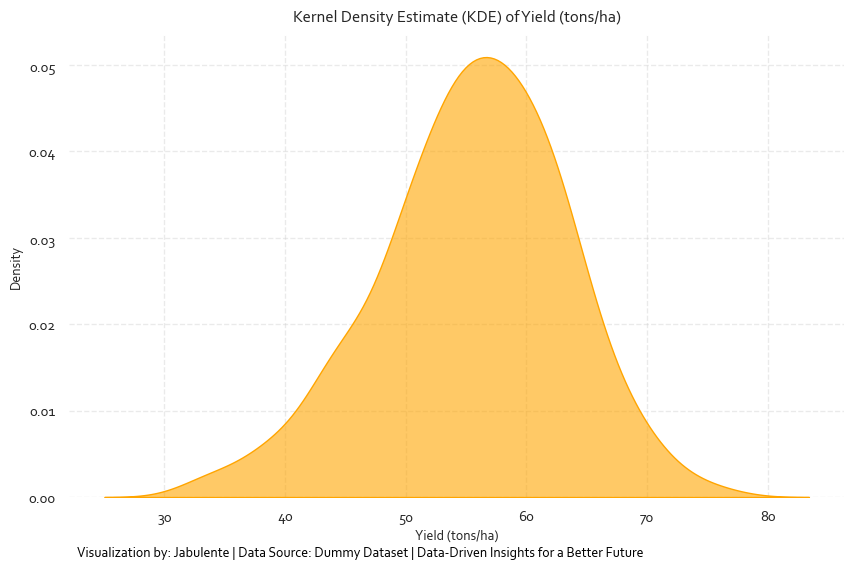

In [140]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 10, "axes.titlesize": 10})
sns.kdeplot(data=data, x='Yield (tons/ha)', fill=True, color='orange', alpha=0.6)
plt.title('Kernel Density Estimate (KDE) of Yield (tons/ha)', fontsize=12, pad=10)
plt.xlabel('Yield (tons/ha)', fontsize=10)
plt.ylabel('Density', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)
    
text = "Visualization by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future" 
plt.text(0.01, -0.12, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.grid(linestyle='--', alpha=0.4)
plt.savefig('../Outputs/0000000001.png', dpi=900)
plt.show()

<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Yield Distributions Between Fertilizer Strategies</span>

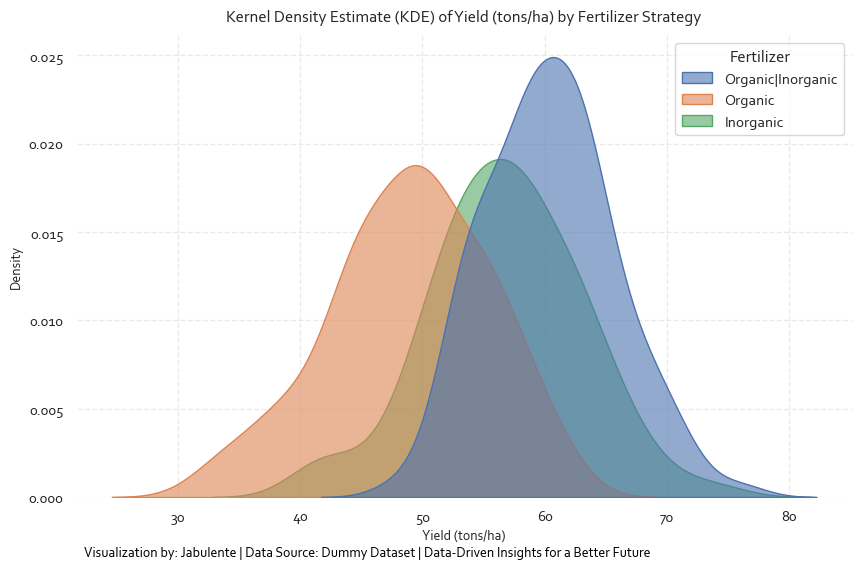

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})
sns.kdeplot(data=data, x='Yield (tons/ha)', hue='Fertilizer', fill=True, alpha=0.6)
plt.title('Kernel Density Estimate (KDE) of Yield (tons/ha) by Fertilizer Strategy', fontsize=12, pad=10)
plt.xlabel('Yield (tons/ha)', fontsize=10)
plt.ylabel('Density', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)
    
text = "Visualization by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future" 
plt.text(0.01, -0.12, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)
plt.grid(linestyle='--', alpha=0.4)
plt.savefig('../Outputs/0000000002.png', dpi=900)
plt.show()

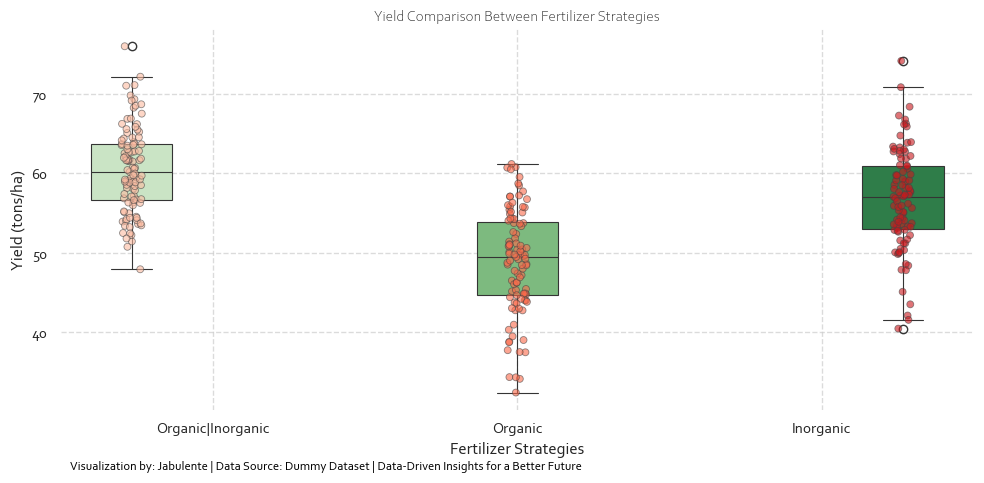

In [89]:
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot( x='Fertilizer',  y='Yield (tons/ha)', data=data,  hue='Fertilizer', palette='Greens',  linewidth=0.8, dodge=True)
sns.stripplot( x='Fertilizer',  y='Yield (tons/ha)',  data=data, hue='Fertilizer',  palette='Reds', 
              size=5, alpha=0.6, dodge=True, linewidth=0.6, edgecolor='auto')

plt.title('Yield Comparison Between Fertilizer Strategies', fontsize=11, fontweight='light')
plt.ylabel('Yield (tons/ha)')
plt.xlabel('Fertilizer Strategies')

for spine in ax.spines.values():
    spine.set_visible(False)

text = "Visualization by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future" 
plt.text(0.01, -0.15, text, ha='left', va='center', fontsize=9, color='black', transform=plt.gca().transAxes)

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../Outputs/0000000003.png', dpi=900)
plt.show()

<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Yield Comparison Across Fertilizers Strategies Using Treemap</span>

C:\Users\user\AppData\Local\Temp\ipykernel_5956\3279632750.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds', len(sizes))


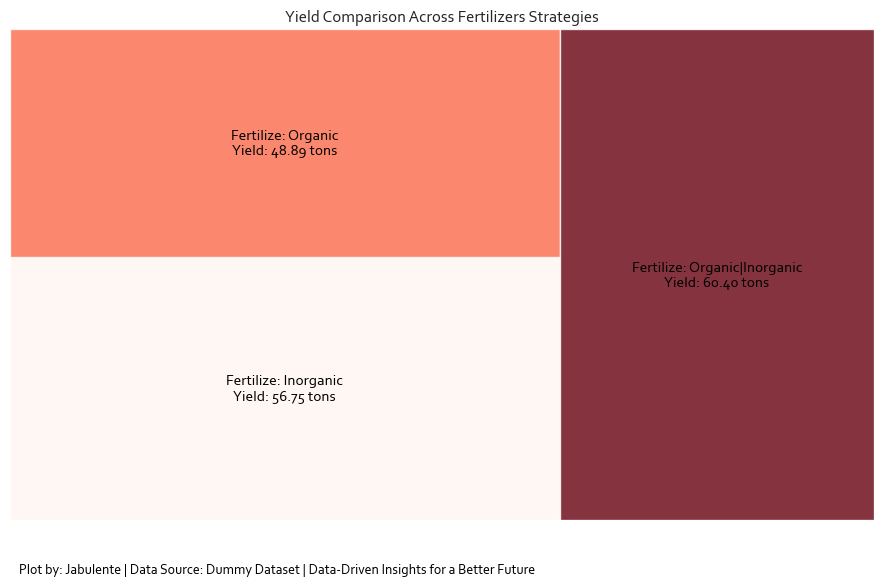

In [90]:
yield_data = data.groupby(['Fertilizer'])['Yield (tons/ha)'].mean().reset_index(name='Yield (tons/ha)')

labels = [f"Fertilize: {row['Fertilizer']}\nYield: {row['Yield (tons/ha)']:.2f} tons" for _, row in yield_data.iterrows()]
sizes = yield_data['Yield (tons/ha)'].tolist()
cmap = cm.get_cmap('Reds', len(sizes))
colors = [cmap(i / (len(sizes) - 1)) for i in range(len(sizes))]


fig, ax = plt.subplots(figsize=(9, 6))
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 11, 'weight': 400, 'color': 'black'})

plt.title('Yield Comparison Across Fertilizers Strategies', fontsize=12)
text =  "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future "
plt.text(0.01, -0.1, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)


plt.axis('off')
plt.tight_layout()
plt.savefig('../Outputs/0000000004.png', dpi=900)
plt.show()

<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Interaction Effect of Soil Type and Fertilizer</span>

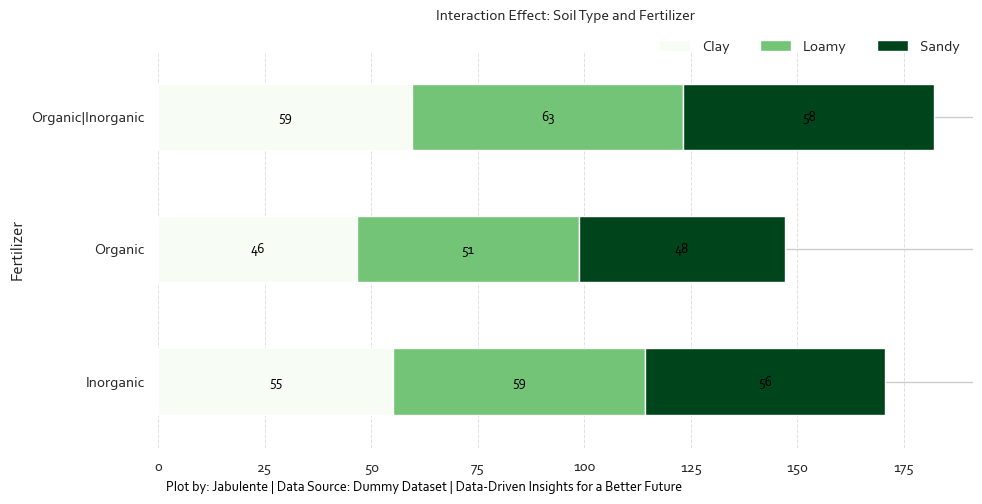

In [93]:
Wesele_df = data.groupby(['Fertilizer', 'Soil Type'])['Yield (tons/ha)'].mean().unstack(fill_value=0)

sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

ax = Wesele_df.plot(kind='barh', stacked=True, figsize=(10, 5), colormap='Greens')
plt.title('Interaction Effect: Soil Type and Fertilizer', fontsize=11, pad=22)

ax.grid( axis='x', linestyle='--', linewidth=0.7, alpha=0.6) 
for spine in ax.spines.values():
    spine.set_visible(False) 
    
for p in ax.patches:
    width = p.get_width()  # Get the width of each segment
    height = p.get_height()  # Get the height (this is the location on the y-axis)
    x = p.get_x() + width / 2  # X position for the label
    y = p.get_y() + height / 2  # Y position for the label
    ax.text(x, y, str(int(width)), ha='center', va='center', fontsize=10, color='black')

plt.legend(bbox_to_anchor=(0.8, 1.06), loc='upper center', ncol=4, frameon=False)
plt.tight_layout()

text =  "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future "
plt.text(0.01, -0.1, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.savefig('../Outputs/0000000005.png', dpi=900)
plt.show()

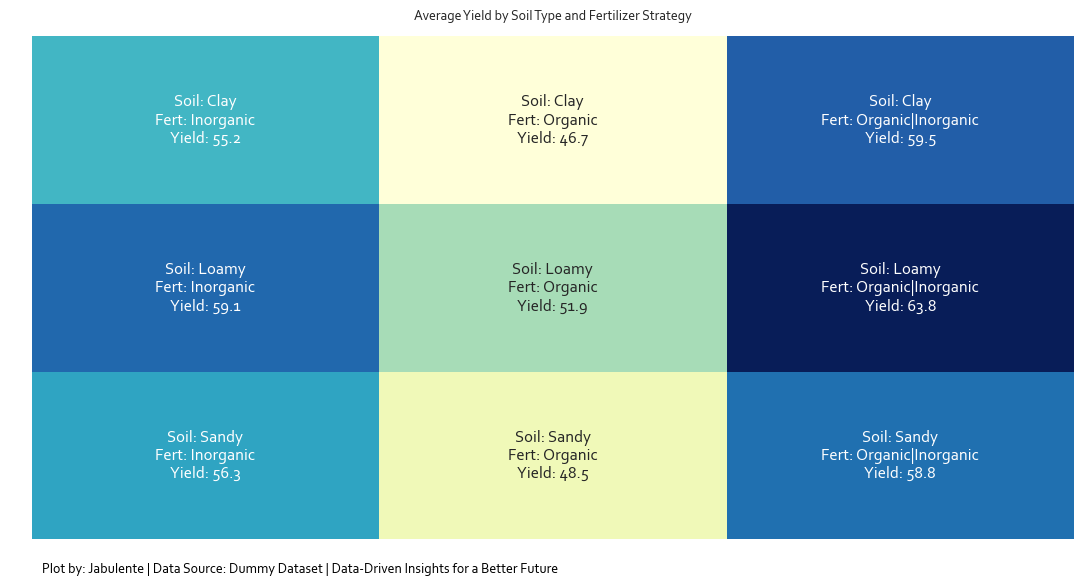

In [95]:
heatmap_data = data.pivot_table(index="Soil Type", columns="Fertilizer", values="Yield (tons/ha)", aggfunc="mean")
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})


annotations = heatmap_data.astype(str)

for row in annotations.index:
    for col in annotations.columns:
        annotations.loc[row, col] = f"Soil: {row}\nFert: {col}\nYield: {heatmap_data.loc[row, col]:.1f}"


plt.figure(figsize=(11, 6))
sns.heatmap(heatmap_data, annot=annotations.values, fmt="", cmap="YlGnBu", cbar=False,linewidths=0.002 )

plt.title("Average Yield by Soil Type and Fertilizer Strategy", fontsize=10, pad=12)
plt.xlabel(" ")
plt.ylabel(" ")

plt.text(
    0.01,  # x-coordinate (left side)
    -0.06,  # y-coordinate (slightly below the plot)
    "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future ", 
    ha='left', va='center', 
    fontsize=10, color='black', 
    transform=plt.gca().transAxes
)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../Outputs/0000000006.png', dpi=900)
plt.show()

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Statistical Testing (Statistical Significance)</h1>
To examine the overall variation in crop yield across different groups, ensuring that the differences observed were not due to random chance. Perform ANOVA tests and assess whether there were statistically significant differences in crop yield based on different fertilizer types.

### T-Test

In [148]:
from scipy.stats import 
from itertools import combinations

def iterative_t_tests(df, group_column, value_column):
    unique_groups = df[group_column].unique()
    group_combinations = list(combinations(unique_groups, 2))
    
    results = []
    
    for group1, group2 in group_combinations:
        # Filter data for the two groups
        group1_data = df[df[group_column] == group1][value_column]
        group2_data = df[df[group_column] == group2][value_column]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(group1_data, group2_data, equal_var=False)
        
        # Append results
        results.append({
            'Group 1': group1,
            'Group 2': group2,
            'T-Statistic': t_stat,
            'P-Value': p_value
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
t_test_results = iterative_t_tests(data, group_column='Fertilizer', value_column='Yield (tons/ha)')
t_test_results

,Group 1,Group 2,T-Statistic,P-Value
0,Organic|Inorganic,Organic,13.826520,1.779559e-30
1,Organic|Inorganic,Inorganic,4.410939,1.757457e-05
2,Organic,Inorganic,-8.496589,5.484534e-15


<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Shapiro-Wilk Test for Normality</h2>

In [136]:
def ShapirowilkTest(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    results = []
    for col in numerical_cols:
        stat, p_value = shapiro(df[col])
        results.append({
            'Variable': col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })
    return pd.DataFrame(results)

shapiro_results = ShapirowilkTest(data)
shapiro_results = shapiro_results.style.format({'Statistic': '{:.4f}', 'P-Value': '{:.3f}' })
shapiro_results

,Variable,Statistic,P-Value,Normality
0,Yield (tons/ha),0.9912,0.071,Normally Distributed


<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Normality Tests (q-q plot)</h2>

- ***Q-Q Plot : The Q-Q plot is used to assess if the yield data follows a normal distribution.***

- ***Histogram: The histogram provides a visual representation of the yield distribution.***

In [ ]:
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer

# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

# Initialize Quantile Transformer
qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(940, len(cleaned_df)), random_state=42)

# Loop through numeric columns
for column in numerical_columns:
    # Apply transformation
    transformed_data = qt.fit_transform(cleaned_df[column].values.reshape(-1, 1)).flatten()
    
    # Create subplots for original and transformed data
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Q-Q Plot for {column}', fontsize=16)
    
    # Q-Q Plot for original data
    stats.probplot(cleaned_df[column], dist="norm", plot=axes[0])
    axes[0].get_lines()[1].set_color('red')  # Set the line of best fit to red
    axes[0].set_title('Before Transformation', fontsize=14)
    axes[0].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[0].set_ylabel('Sample Quantiles', fontsize=12)
    axes[0].grid(linestyle='--', alpha=0.6)
    
    # Q-Q Plot for transformed data
    stats.probplot(transformed_data, dist="norm", plot=axes[1])
    axes[1].get_lines()[1].set_color('red')  # Set the line of best fit to red
    axes[1].set_title('After Transformation', fontsize=14)
    axes[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[1].set_ylabel('Sample Quantiles', fontsize=12)
    axes[1].grid(linestyle='--', alpha=0.6)
    
    # Adjust layout and display the plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the main title
    plt.savefig(f'../Outputs/{column} Q-Q plot Normal Distributions Comparison.png', dpi=900)
    plt.show()

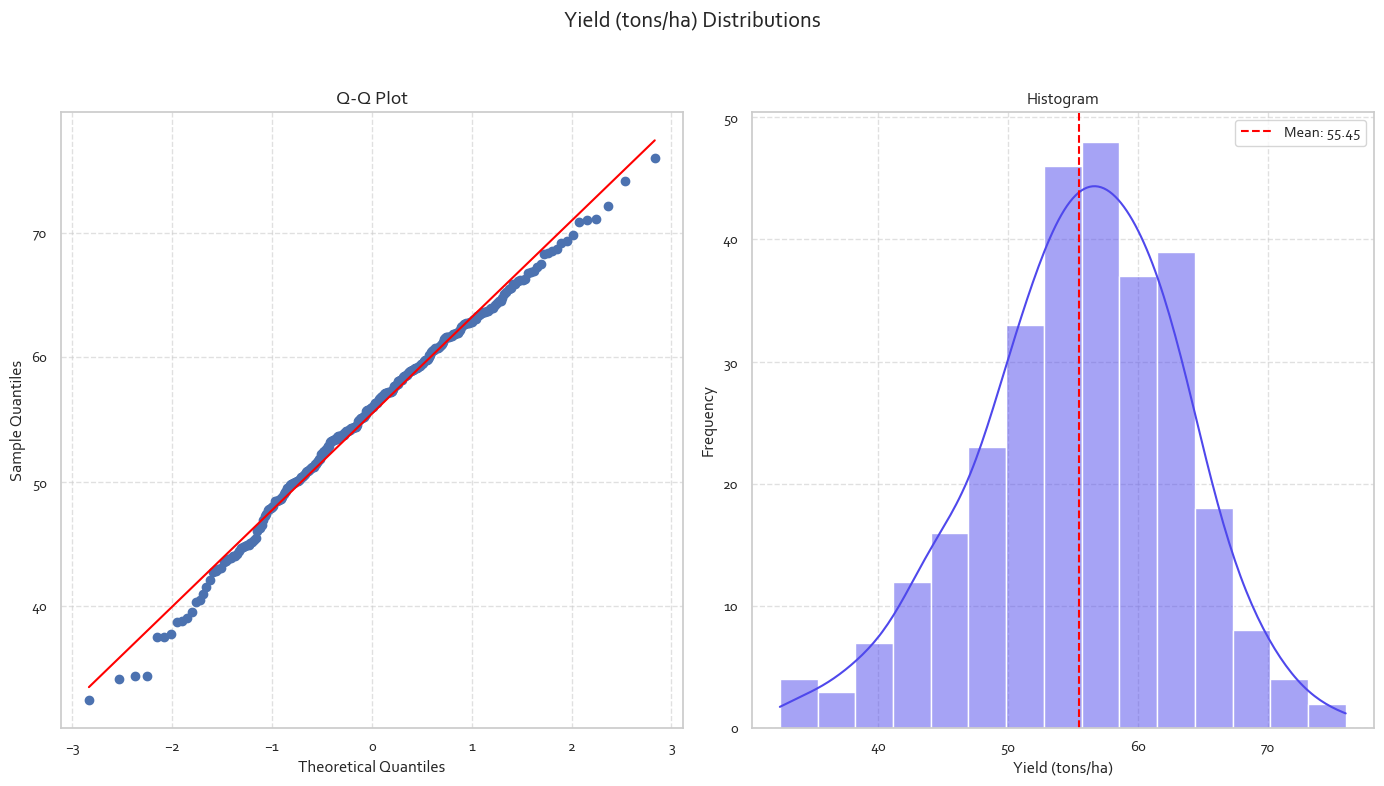

In [99]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

for column in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    fig.suptitle(f'{column} Distributions', fontsize=16)
    
    # Q-Q Plot for original data
    stats.probplot(data[column], dist="norm", plot=axes[0])
    axes[0].get_lines()[1].set_color('red')  # Set the line of best fit to red
    axes[0].set_title('Q-Q Plot', fontsize=14)
    axes[0].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[0].set_ylabel('Sample Quantiles', fontsize=12)
    axes[0].grid(linestyle='--', alpha=0.6)
    
    
    # Plot the original distribution
    sns.histplot(data[column], ax=axes[1], kde=True, fill=True, color="#4F48EC")
    axes[1].set_title("Histogram", fontsize=12)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Frequency")
    mean_value_before = data[column].mean()
    axes[1].axvline(mean_value_before, color='red', linestyle='--', label=f'Mean: {mean_value_before:.2f}')
    axes[1].legend()
    axes[1].grid(linestyle='--', alpha=0.6)


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('../Outputs/0000000007.png', dpi=900)
    plt.show()

**Observation**: 

- **Q-Q Plot:** Most points align closely with the diagonal red line, indicating that the data is approximately normally distributed. However, there are slight deviations at the tails, which suggest potential outliers or minor non-normality.
- The **histogram** shows a roughly bell-shaped curve, consistent with normal distribution.
- The **density curve** further confirms the approximate normality of the data.

<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Homogeneity of Varience (Levanes Test)</h2>
The Levene's test is used to assess the homogeneity of variances across groups. Below is the Python code to perform Levene's test for all numerical variables in a DataFrame (df) and return the results in a formatted pandas DataFrame for easy comparison.

In [100]:
def LevenesTest(data, group_col):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference([group_col])
    results = []
    for col in numerical_cols:
        grouped_data = [group[col].values for _, group in data.groupby(group_col)]
        stat, p_value = levene(*grouped_data)
        results.append({'Variable': col, 'Statistic': stat, 'P-Value': p_value, 
                        'Homogeneity': 'Homogeneous Varience' if p_value > 0.05 else 'Not Homogeneous Varience'})
    return pd.DataFrame(results)
    
levene_results = LevenesTest(data, group_col='Fertilizer')
levene_results = levene_results.style.format({'Statistic': '{:.2f}', 'P-Value': '{:.4f}'})
levene_results

,Variable,Statistic,P-Value,Homogeneity
0,Yield (tons/ha),1.84,0.1610,Homogeneous Varience


<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Analysis of Varience (ANOVA) To compare Means</h2>

***To conduct ANOVA tests and assess whether there were statistically significant differences in crop yield based on different fertilizer types.***

In [106]:
df = data.copy()
df.rename(columns={'Yield (tons/ha)': 'Yield'}, inplace=True)
import scipy.stats as stats
numerical_cols = df.select_dtypes(include=[np.number]).columns

anova_results = {}

for col in numerical_cols:
    groups = df.groupby('Fertilizer')[col].apply(list)
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_stat, 'P-value': p_value }
    
anova_df = pd.DataFrame(anova_results).T
anova_df['Interpretation'] = anova_df['P-value'].apply(lambda x: 'Statistically Significant' if x < 0.05 else 'Not Statistically Significant')
anova_df

,F-statistic,P-value,Interpretation
Yield,96.326923,5.698898e-33,Statistically Significant


<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Interpretation of ANOVA Results</span>

1. **F-statistic: 96.33**
   - **Interpretation**: The F-statistic of **96.33** is quite large, which indicates a strong relationship between the **fertilizer type** (categorical variable) and **yield** (dependent variable). This suggests that the variability in yield due to fertilizer type is much higher than the variability within each fertilizer group. A large F-statistic is often an indicator of a meaningful difference between group means.

2. **P-value: 5.70e-33**
   - **Interpretation**: The **p-value** is extremely small $(5.70 × 10^-33)$, much smaller than the commonly used significance level of 0.05. This suggests that the results are **statistically significant** and that the null hypothesis (which assumes no effect of fertilizer on yield) can be rejected. Therefore, we can confidently say that the fertilizer type does have a statistically significant effect on crop yield.

3. **Interpretation: Statistically Significant**
   - **Insight**: The analysis confirms that **fertilizer type** has a **significant effect** on **crop yield**, meaning that different fertilizers are likely to result in different yield outcomes. This implies that fertilizer choice should be carefully considered by farmers as it can impact crop productivity.

<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Summary of Insight</span>

The ANOVA results strongly support the idea that the choice of fertilizer has a significant effect on crop yield, and based on these findings, different fertilizers may yield different results in crop production. Therefore, understanding the best-performing fertilizer for optimal yield can guide farming practices.

<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Post-Hoc test using Tukey's HSD</h2>

<span style='font-size: 18px; color: black; font-family: Dubai; font-weight: 600'>Tukey's HSD Results</span>

In [145]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def Turkey_results(Variable='', group=''):
    turkey_results = pairwise_tukeyhsd(endog=df[Variable], groups=df[group], alpha=0.05)
    
    # Extract the groups and create a DataFrame
    results_table = turkey_results.summary()
    results_data = []
    
    for i in range(1, len(results_table)):
        row = results_table.data[i]
        results_data.append({
            'Group1': row[0],
            'Group2': row[1],
            'Mean Difference': row[2],
            'P-Value': row[3],
            'Lower CI': row[4],
            'Upper CI': row[5],
            'Reject Null': row[6]
        })
    
    result_df = pd.DataFrame(results_data)
    return result_df

# Example Usage
formatted_results = Turkey_results(Variable='Yield', group='Fertilizer')
formatted_results

,Group1,Group2,Mean Difference,P-Value,Lower CI,Upper CI,Reject Null
0,Inorganic,Organic,-7.8619,0.0000,-9.9129,-5.8109,True
1,Inorganic,Organic|Inorganic,3.6496,0.0001,1.6362,5.6629,True
2,Organic,Organic|Inorganic,11.5115,0.0000,9.5254,13.4976,True


<span style='font-size: 17px; color: black; font-family: Dubai; font-weight: 600'>Tukey HSD Test Results for Yield Comparison</span>

The Tukey HSD test revealed that **Organic|Inorganic fertilizer** consistently produced the highest yields compared to both **Organic** and **Inorganic fertilizers**, with statistically significant mean differences of 11.51 tons/ha and 3.65 tons/ha, respectively. In contrast, **Inorganic fertilizer** resulted in significantly lower yields than **Organic fertilizer**, with a mean difference of -7.86 tons/ha. These findings highlight that **Organic|Inorganic fertilizer** is the most effective option for maximizing crop yield, while **Inorganic fertilizer** is the least effective among the three.

<span style='font-size: 18px; color: black; font-family: Dubai; font-weight: 600'>Tukey's HSD Results Visualization</span>

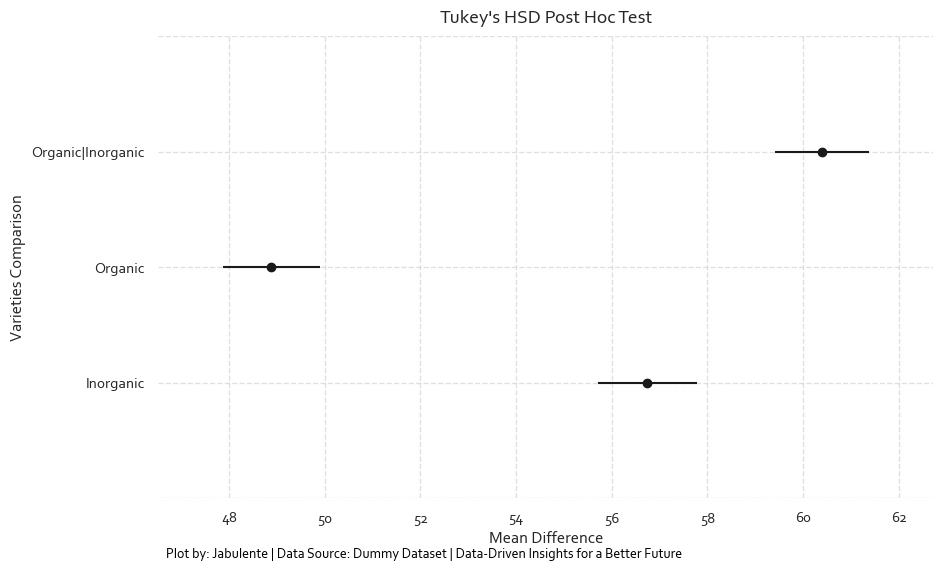

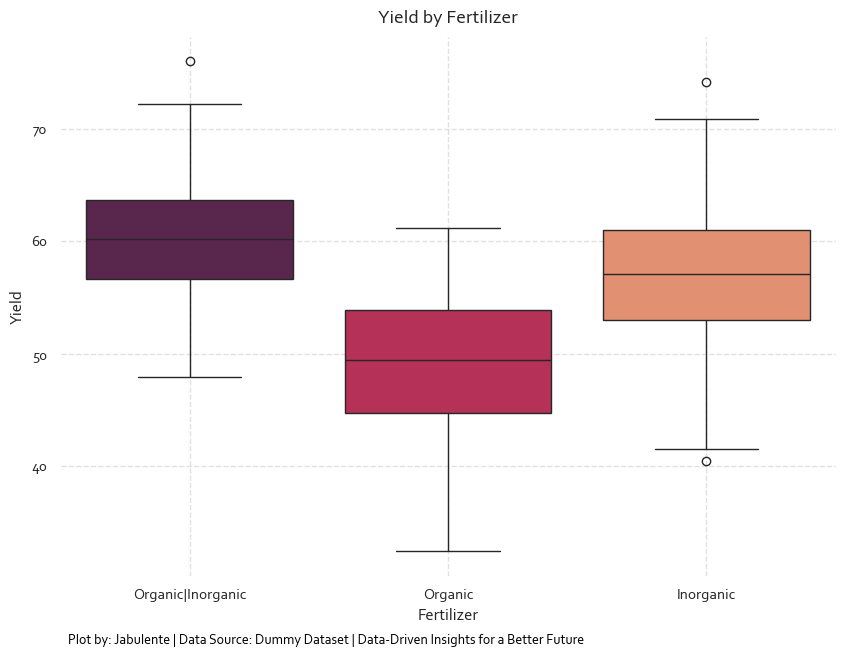

In [138]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def Turkey_HSD_Visualization(Variable='', group=''):
    sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})
    
    # Post-Hoc test using Tukey's HSD
    Turkey_results = pairwise_tukeyhsd(endog=df[Variable], groups=df[group], alpha=0.05)
    
    # Tukey's HSD plot
    fig, ax = plt.subplots(figsize=(10, 7))  # Explicitly define ax
    Turkey_results.plot_simultaneous(comparison_name=None, ax=ax)
    plt.title("Tukey's HSD Post Hoc Test", pad=10)
    plt.xlabel('Mean Difference')
    plt.ylabel('Varieties Comparison')
    plt.grid(linestyle='--', alpha=0.6)
    text = "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future" 
    plt.text(0.01, -0.12, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.savefig('../Outputs/0000000008.png', dpi=900)
    plt.show()

    # Boxplot visualization
    fig, ax = plt.subplots(figsize=(10, 7))  # Explicitly define ax
    sns.boxplot(x=group, y=Variable, hue=group, data=df, palette="rocket", ax=ax)
    plt.title(f"{Variable} by {group}", pad=10)
    plt.xlabel(group)
    plt.ylabel(Variable)
    plt.grid(linestyle='--', alpha=0.6)
    text = "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future" 
    plt.text(0.01, -0.12, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.savefig('../Outputs/0000000009.png', dpi=900)
    plt.show()

# Example usage
Turkey_HSD_Visualization(Variable='Yield', group='Fertilizer')

<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Effect Size Assessment (Cohen’s d)</h2>

- To calculate Cohen’s d to measure the magnitude of differences in crop yield between pairs of fertilizer types (Organic, Inorganic, and Organic|Inorganic).
- To determine which fertilizer combinations led to the most substantial yield differences, helping to understand the practical significance of each fertilizer treatment.

In [133]:
def cohens_d(group1, group2):
    # Calculate Cohen's d for independent samples
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
    return (mean1 - mean2) / pooled_std


fertilizer_groups = data['Fertilizer'].unique()  # Get unique fertilizers
cohen_results = {}

for i in range(len(fertilizer_groups)):
    for j in range(i + 1, len(fertilizer_groups)):  # Ensure each pair is unique
        group1 = data[data['Fertilizer'] == fertilizer_groups[i]]['Yield (tons/ha)']
        group2 = data[data['Fertilizer'] == fertilizer_groups[j]]['Yield (tons/ha)']
        
        # Calculate Cohen's d for this pair
        d_value = cohens_d(group1, group2)
        pair = (fertilizer_groups[i], fertilizer_groups[j])
        cohen_results[pair] = d_value


def interpret_cohens_d(d_value):
    """Interpret Cohen's d value and provide an explanation."""
    if abs(d_value) < 0.2:
        interpretation = "Small effect size"
        explanation = "There is a small difference between the groups, and the effect is minimal."
    elif 0.2 <= abs(d_value) < 0.5:
        interpretation = "Medium effect size"
        explanation = "The difference between the groups is moderate, with noticeable effects."
    elif 0.5 <= abs(d_value) < 0.8:
        interpretation = "Large effect size"
        explanation = "There is a large difference between the groups, with a strong effect."
    else:
        interpretation = "Very large effect size"
        explanation = "The difference between the groups is very large, indicating a very strong effect."
    return interpretation, explanation

cohen_data = pd.DataFrame(list(cohen_results.items()), columns=['Pair', 'Cohens d'])

cohen_data

,Pair,Cohens d
0,"(Organic|Inorganic, Organic)",1.936008
1,"(Organic|Inorganic, Inorganic)",0.627095
2,"(Organic, Inorganic)",-1.223037


<span style='font-size: 20px; color: black; font-family: Dubai; font-weight: 600'>Cohen’s d Results Interpretation </span>

In [135]:
cohen_data['Interpretation'] = cohen_data['Cohens d'].apply(interpret_cohens_d)
pd.set_option('display.max_colwidth', 120) #Increase the max_colwidth value to avoid truncation
cohen_data

,Pair,Cohens d,Interpretation
0,"(Organic|Inorganic, Organic)",1.936008,"(Very large effect size, The difference between the groups is very large, indicating a very strong effect.)"
1,"(Organic|Inorganic, Inorganic)",0.627095,"(Large effect size, There is a large difference between the groups, with a strong effect.)"
2,"(Organic, Inorganic)",-1.223037,"(Very large effect size, The difference between the groups is very large, indicating a very strong effect.)"


### Interpretation of Cohen’s d Results

1. **(Organic|Inorganic, Organic) - Cohen's d: 1.936**
   - **Interpretation**: This result indicates a **large effect size** between the "Organic|Inorganic" and "Organic" fertilizer groups. The positive Cohen’s d value suggests that crop yield from the "Organic|Inorganic" combination is **significantly higher** than from the "Organic" group.
   - **Insight**: Using a combined Organic|Inorganic fertilizer seems to have a much stronger positive impact on crop yield compared to using Organic fertilizer alone. This insight may encourage farmers to consider mixed fertilizer options for potentially higher yields.

2. **(Organic|Inorganic, Inorganic) - Cohen's d: 0.627**
   - **Interpretation**: This result indicates a **medium effect size** between the "Organic|Inorganic" and "Inorganic" groups. The positive Cohen’s d value shows that the crop yield from the "Organic|Inorganic" combination is higher than from the "Inorganic" group, but the difference is moderate.
   - **Insight**: While "Organic|Inorganic" performs better than "Inorganic," the difference is not as striking as the first comparison. This suggests that although the combined fertilizer may provide some improvement, the additional benefits may not be as substantial as in the first case.

3. **(Organic, Inorganic) - Cohen's d: -1.223**
   - **Interpretation**: This result indicates a **large negative effect size** between the "Organic" and "Inorganic" groups. The negative Cohen’s d value suggests that crop yield from the "Inorganic" fertilizer group is **significantly higher** than from the "Organic" group.
   - **Insight**: The results suggest that **Inorganic fertilizer** has a significantly greater positive impact on crop yield than **Organic fertilizer**. This finding could lead to a reevaluation of the effectiveness of organic fertilizers when compared to inorganic options for maximizing crop production.

### Summary of Insights:
- **Organic|Inorganic mix** provides the most substantial benefit in terms of crop yield when compared to both Organic and Inorganic fertilizers.
- **Inorganic fertilizer** outperforms **Organic fertilizer**, leading to higher crop yields.
- The analysis suggests that **combining fertilizers** (Organic|Inorganic) could offer a significant boost in yield compared to using them separately, particularly when compared to the Organic-only group.

These insights can guide farmers in making informed decisions about fertilizer use, emphasizing the potential advantages of mixed fertilizer strategies for improved crop production.